In [20]:
import requests
import json
import pandas

In [21]:
import requests
import json
import pandas
 

headers = {'Authorization': '3e6897cd481a4d4083d1c20fc3cfa329'}
 
everything_news_url = 'https://newsapi.org/v2/everything'

everything_payload = {'q': 'millet', 'language': 'en', 'sortBy': 'popularity'}

# headlines_news_url = 'https://newsapi.org/v2/top-headlines'

# headlines_payload = {'q': 'millets production','category': 'business', 'country': 'in'}

# sources_news_url = 'https://newsapi.org/v2/sources'

# sources_payload = {'category': 'general', 'language': 'en', 'country': 'in'}


response = requests.get(url=everything_news_url, headers=headers, params=everything_payload)
 
# response = requests.get(url=headlines_news_url, headers=headers, params=headlines_payload)

# response = requests.get(url=sources_news_url, headers=headers, params=sources_payload)

pretty_json_output = json.dumps(response.json(), indent=4)
print(pretty_json_output)

{
    "status": "ok",
    "totalResults": 150,
    "articles": [
        {
            "source": {
                "id": null,
                "name": "The Guardian"
            },
            "author": "Mark Johanson",
            "title": "Switzerland unplugged: a hike in the off-grid Bavona valley",
            "description": "Using paths surrounded by terraced chestnut groves, walkers can encounter a traditional corner of Europe untouched by mains electricityWhen hydroelectric power first arrived in Switzerland\u2019s Bavona valley in the 1950s, residents of its 12 hamlets gathered for\u2026",
            "url": "https://www.theguardian.com/travel/2023/apr/20/hike-in-switzerland-off-grid-bavona-valley",
            "urlToImage": "https://i.guim.co.uk/img/media/4f146ab4421e02ee285ce8168e4d12b73f8b44f4/0_35_7360_4415/master/7360.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmY

In [22]:
# print(response.json())
 
# To store the relevant json data to a csv
 
# Convert response to a pure json string
response_json_string = json.dumps(response.json())
 
# A json object is equivalent to a dictionary in Python
# retrieve json objects to a python dict
response_dict = json.loads(response_json_string)
print(response_dict)

{'status': 'ok', 'totalResults': 150, 'articles': [{'source': {'id': None, 'name': 'The Guardian'}, 'author': 'Mark Johanson', 'title': 'Switzerland unplugged: a hike in the off-grid Bavona valley', 'description': 'Using paths surrounded by terraced chestnut groves, walkers can encounter a traditional corner of Europe untouched by mains electricityWhen hydroelectric power first arrived in Switzerland’s Bavona valley in the 1950s, residents of its 12 hamlets gathered for…', 'url': 'https://www.theguardian.com/travel/2023/apr/20/hike-in-switzerland-off-grid-bavona-valley', 'urlToImage': 'https://i.guim.co.uk/img/media/4f146ab4421e02ee285ce8168e4d12b73f8b44f4/0_35_7360_4415/master/7360.jpg?width=1200&height=630&quality=85&auto=format&fit=crop&overlay-align=bottom%2Cleft&overlay-width=100p&overlay-base64=L2ltZy9zdGF0aWMvb3ZlcmxheXMvdGctZGVmYXVsdC5wbmc&enable=upscale&s=f4714bce8c4232e56973c2702a7b35a0', 'publishedAt': '2023-04-20T06:00:39Z', 'content': 'When hydroelectric power first arrive

In [23]:
articles_list = response_dict['articles']

In [ ]:
#articles_list

In [24]:
# Convert articles list to json string , convert json string to dataframe , write df to csv!
df = pandas.read_json(json.dumps(articles_list))
 
# Convert sources list to json string , convert json string to dataframe , write df to csv!
# df = pandas.read_json(json.dumps(sources_list))
 
# Using Pandas write the json data to a csv
df.to_csv('news.csv')

In [33]:
df['url'][0]

'https://www.theguardian.com/travel/2023/apr/20/hike-in-switzerland-off-grid-bavona-valley'

In [29]:
d = df[df['source'].apply(lambda x: x.get('name') == 'The Times of India')]

In [38]:
d

,source,author,title,description,url,urlToImage,publishedAt,content
69,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,"Govt making efforts to boost production, consu...",Union Agriculture Minister Narendra Singh Toma...,https://economictimes.indiatimes.com/news/econ...,"https://img.etimg.com/thumb/msid-99853732,widt...",2023-04-28T17:24:25Z,Union Agriculture Minister Narendra Singh Toma...
96,"{'id': 'the-times-of-india', 'name': 'The Time...",ANI,Why India is making such a big deal out of mil...,"India, the world's largest producer and second...",https://economictimes.indiatimes.com/news/how-...,"https://img.etimg.com/thumb/msid-99501640,widt...",2023-04-14T17:20:22Z,At a time when the two extremes of malnourishm...
97,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,"FSSAI finds 32 new cases of misleading ads, cl...",Food regulator FSSAI on Friday said there are ...,https://economictimes.indiatimes.com/news/indi...,"https://img.etimg.com/thumb/msid-99853642,widt...",2023-04-28T17:16:34Z,Food regulator FSSAI on Friday said there are ...
98,"{'id': 'the-times-of-india', 'name': 'The Time...",PTI,Three-day G20 meeting of chief agri scientists...,The 'Millets And Other Ancient GRains Internat...,https://economictimes.indiatimes.com/news/indi...,"https://img.etimg.com/thumb/msid-99537442,widt...",2023-04-16T13:25:32Z,A three-day Meeting of Agricultural Chief Scie...


In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import codecs

import re


driver = webdriver.Chrome()

dir_path = 'news-corpus//'
i=0
for url in d['url']:

    driver.get(url)

    
    page_source = driver.page_source

    
    soup = BeautifulSoup(page_source, 'html.parser')

    
    div_tag = soup.find('div', {'class': 'artText medium'})

    article_txt = div_tag.text  
    
    if not article_txt == None:
        i = i+1
        outfile = dir_path + str(i) +"_article.txt"
        f = codecs.open(outfile, "w", "utf-8")
        f.write(article_txt)
        f.close()
        
    print("==========================================================")

    # Close the browser window
    
driver.quit()


In [22]:
import os
import codecs

corpus_path = "news-corpus//"
article_paths = [os.path.join(corpus_path,p) for p in os.listdir(corpus_path)]

doc_complete = []
for path in article_paths:
    with open(path, 'rb') as f:
        doc_content = f.read().decode(errors='ignore')
        doc_complete.append(doc_content)


In [31]:
doc_complete[0]

'At a time when the two extremes of malnourishment and obesity plague large portions of the world, India, has taken it upon herself to educate the masses about these small-seeded grasses that are highly beneficial to human health.Millet and grain cereals, despite being rich sources of protein and antioxidants with high nutritional value have never been considered fashionable foods, however, India has done remarkably well when it has come to meeting the caloric needs and demands of her people.India, the world\'s largest producer, and the world\'s second-largest exporter of millet are hoping to change the humble millet\'s reputation worldwide.Unlike a large part of the rest of the world, almost every Indian household is acquainted with the taste and the benefits of millet.Millets have been a staple of the Indian diet, especially in rural India, for years and remain prevalent even today. They have been a large contributor to Indians\' balanced diets.The Government of India has identified 

In [32]:
len(doc_complete)

6

In [33]:
doc_complete[0]

'At a time when the two extremes of malnourishment and obesity plague large portions of the world, India, has taken it upon herself to educate the masses about these small-seeded grasses that are highly beneficial to human health.Millet and grain cereals, despite being rich sources of protein and antioxidants with high nutritional value have never been considered fashionable foods, however, India has done remarkably well when it has come to meeting the caloric needs and demands of her people.India, the world\'s largest producer, and the world\'s second-largest exporter of millet are hoping to change the humble millet\'s reputation worldwide.Unlike a large part of the rest of the world, almost every Indian household is acquainted with the taste and the benefits of millet.Millets have been a staple of the Indian diet, especially in rural India, for years and remain prevalent even today. They have been a large contributor to Indians\' balanced diets.The Government of India has identified 

### Iterate over all the elements in the doc_complete list and replace all occurrences of \ and / with an empty string ''

In [121]:
# for i in range(len(doc_complete)):
#     doc_complete[i] = doc_complete[i].replace('\\', '').replace('\\u', '').replace('r\\', '')
# for i in range(len(doc_complete)):
#     doc_complete[i] = doc_complete[i].replace('\\', '').replace('/', '')
# for i in range(len(doc_complete)):
#     doc_complete[i] = doc_complete[i].replace('\\', '')


In [34]:
import re
for i in range(len(doc_complete)):
    doc_complete[i] = re.sub(r'[^\w\s.]', '', doc_complete[i])


In [41]:
doc_complete[0]

'At a time when the two extremes of malnourishment and obesity plague large portions of the world India has taken it upon herself to educate the masses about these smallseeded grasses that are highly beneficial to human health.Millet and grain cereals despite being rich sources of protein and antioxidants with high nutritional value have never been considered fashionable foods however India has done remarkably well when it has come to meeting the caloric needs and demands of her people.India the worlds largest producer and the worlds secondlargest exporter of millet are hoping to change the humble millets reputation worldwide.Unlike a large part of the rest of the world almost every Indian household is acquainted with the taste and the benefits of millet.Millets have been a staple of the Indian diet especially in rural India for years and remain prevalent even today. They have been a large contributor to Indians balanced diets.The Government of India has identified millet as a safe bet

In [42]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

def rank_sentences(doc, num_sentences):
    # Tokenize the document into sentences and words
    sentences = nltk.sent_tokenize(doc)
    words = nltk.word_tokenize(doc.lower())
    
    # Filter out stop words and punctuation
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalnum() and word not in stop_words]
    
    # Calculate the frequency of each word
    word_freq = Counter(words)
    
    # Rank the sentences by the sum of the frequency of each word in the sentence
    sentence_scores = []
    for sentence in sentences:
        score = sum([word_freq[word] for word in nltk.word_tokenize(sentence.lower()) if word in word_freq])
        sentence_scores.append((score, sentence))
    
    # Sort the sentences in descending order of score and return the top n
    sentence_scores.sort(reverse=True)
    ranked_sentences = [sentence for score, sentence in sentence_scores][:num_sentences]
    #print(ranked_sentences)
    
    return ' '.join(ranked_sentences)


In [45]:
data = rank_sentences(doc_complete[0], 3)

In [46]:
data

'While this is already a vast number of people proponents of millet production are of the opinion that a greater number of people should include millet in their diet.Millets are versatile grains that grow in half the time as wheat and use 70 per cent less water than rice providing a multifold benefit.A concentrated campaign to enhance the production and consumption of millets which are rich in carbs proteins and vitamins can change the entire paradigm of the food and health industry globally.Several experts have agreed that a sincere effort towards millet production can help countries effectively overcome micronutrient deficiencies.India already a selfsufficient country when it comes to ensuring food for its people is on a mission to capitalize on its millet market and deliver its people the benefits that go beyond just one aspect of human welfare. It was a remarkable achievement considering India had not even touched the export mark of USD 30 million worth of millets in 2019 and 2020.

In [184]:
#pip install prettytable

In [18]:
import re
import nltk
import heapq
from prettytable import PrettyTable

def sentence_scores(sentences):
    stopWords = set(nltk.corpus.stopwords.words("english"))
    word_frequencies = {}
    for word in nltk.word_tokenize(sentences):
        if word not in stopWords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    maximum_frequency = max(word_frequencies.values())
    
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word] / maximum_frequency)
    sentence_scores = {}
    
    for sent in nltk.sent_tokenize(sentences):
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 40:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]
    return sentence_scores

def summary(sentences, num_sentences):
    sentence_scores_dict = sentence_scores(sentences)
    summary_sentences = heapq.nlargest(num_sentences, sentence_scores_dict, key=sentence_scores_dict.get)
    
    x = PrettyTable()
    x.field_names = ["Score", "Sentence"]
    for sentence in summary_sentences:
        score = sentence_scores_dict[sentence]
        x.add_row([score, sentence])
    print(x)
    


In [45]:
summary(doc_complete[0],3)

+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|       Score        |                                                                                                            Sentence                                                                                                           |
+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 2.9800000000000004 |                                                   The Government of India, to encourage millets' cultivation and consumption, declared 2018 as the national year of millets.                                                  |
|        2.1

In [47]:
summary(doc_complete[1],7)

+----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|  Score   |                                                                                                                                    Sentence                                                                                                                                   |
+----------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 14.34375 | Invited guest countries (Bangladesh, Egypt, Mauritius, Netherlands, Nigeria, Oman, Singapore, Spain, the UAE, Vietnam) and internati

In [21]:
summary(doc_complete[2],7)

+--------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|       Score        |                                                                                                            Sentence                                                                                                            |
+--------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 2.8695652173913038 | He added that this centre will enable the consumers to enjoy an expansive Millet menu and an instore shopping experience featuring a wide variety of milletbased products developed by homegrown startups  all under one roof. |
| 2.8260

In [48]:
summary(doc_complete[3],7)

+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|       Score        |                                                                                                                     Sentence                                                                                                                    |
+--------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 9.173913043478263  | The food products scrutinised include various range of products like health supplements, organic products, fast-moving consumer goods (FMCG) products, staples etc and the claims iden

In [56]:
summary(doc_complete[4],4)

+--------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|       Score        |                                                                                               Sentence                                                                                               |
+--------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| 9.115384615384615  | "Last year, the revenue from the hived off brands - Kitchenji (dals, staples and spices), Madhuram (bulk grain and pulse), Freshey's (ready-to-cook items, dairy products) - was about Rs 400 crore. |
| 7.076923076923076  |        The business requires a new set of skills, distribution, product development, sale

In [26]:
from textblob import TextBlob

Positive = 0
Negative = 0

Neutral = 0

for doc in doc_complete:
    
    blob = TextBlob(doc)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        Positive = Positive+1
    elif sentiment < 0:
        Negative = Negative+1
    else:
        Neutral = Neutral+1
        
    print(f"Positive :{Positive},Negative:{Negative},Neutral:{Neutral} ")


Positive :1,Negative:0,Neutral:0 
Positive :2,Negative:0,Neutral:0 
Positive :3,Negative:0,Neutral:0 
Positive :4,Negative:0,Neutral:0 
Positive :5,Negative:0,Neutral:0 


In [27]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the text
for doc in doc_complete:
    sentiment = sia.polarity_scores(doc)

    # Print the sentiment scores
    print(sentiment)

{'neg': 0.01, 'neu': 0.875, 'pos': 0.114, 'compound': 0.997}
{'neg': 0.0, 'neu': 0.928, 'pos': 0.072, 'compound': 0.9868}
{'neg': 0.003, 'neu': 0.861, 'pos': 0.137, 'compound': 0.9963}
{'neg': 0.08, 'neu': 0.863, 'pos': 0.057, 'compound': -0.872}
{'neg': 0.004, 'neu': 0.948, 'pos': 0.048, 'compound': 0.9413}


[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 60]
[nltk_data]     Operation timed out>


__inferences__:
  - The compound score is a normalized, weighted composite score that ranges from -1 (extremely negative) to +1 (extremely positive). In the case of 4th article, the compound score is negative, indicating that the article has a negative sentiment. The negative score of 0.08 suggests that the negative sentiment is not very strong, but it is still present in the article.

### neg: 0.01 (represents the negative sentiment score)
### neu: 0.875 (represents the neutral sentiment score)
### pos: 0.114 (represents the positive sentiment score)
### compound: 0.997 (represents the overall sentiment score, where values closer to 1 indicate a highly positive sentiment, and values closer to -1 indicate a highly negative sentiment)

# WORD CLOUD

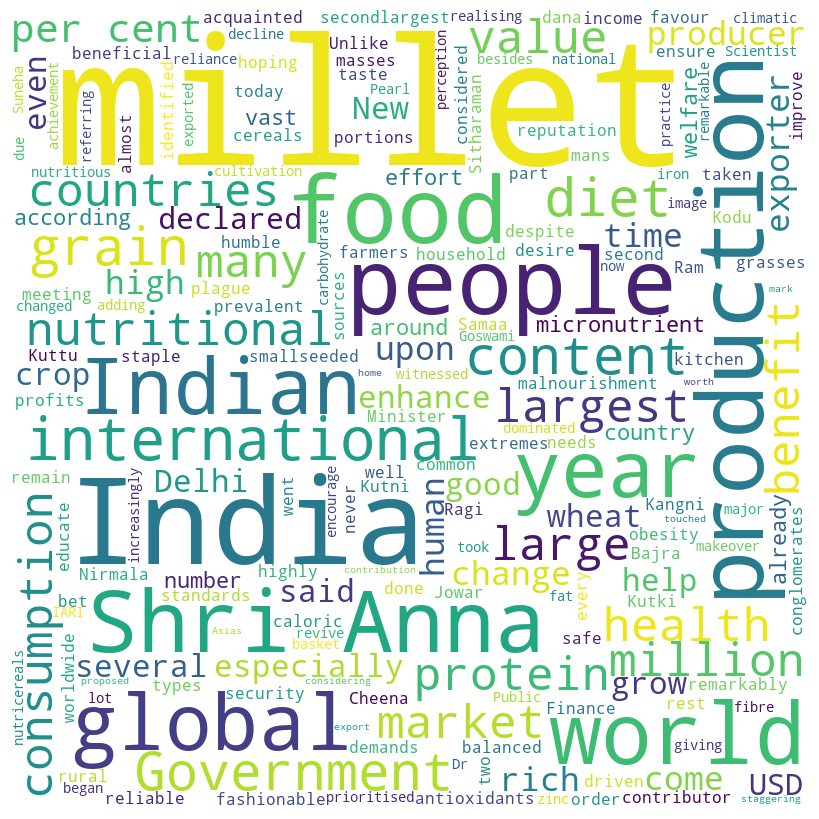

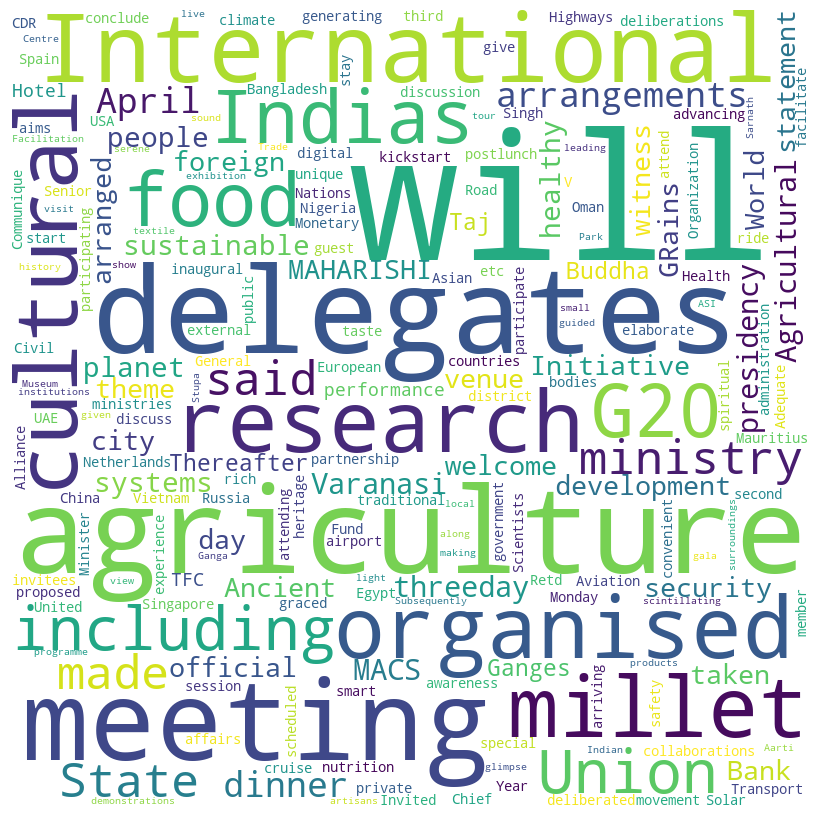

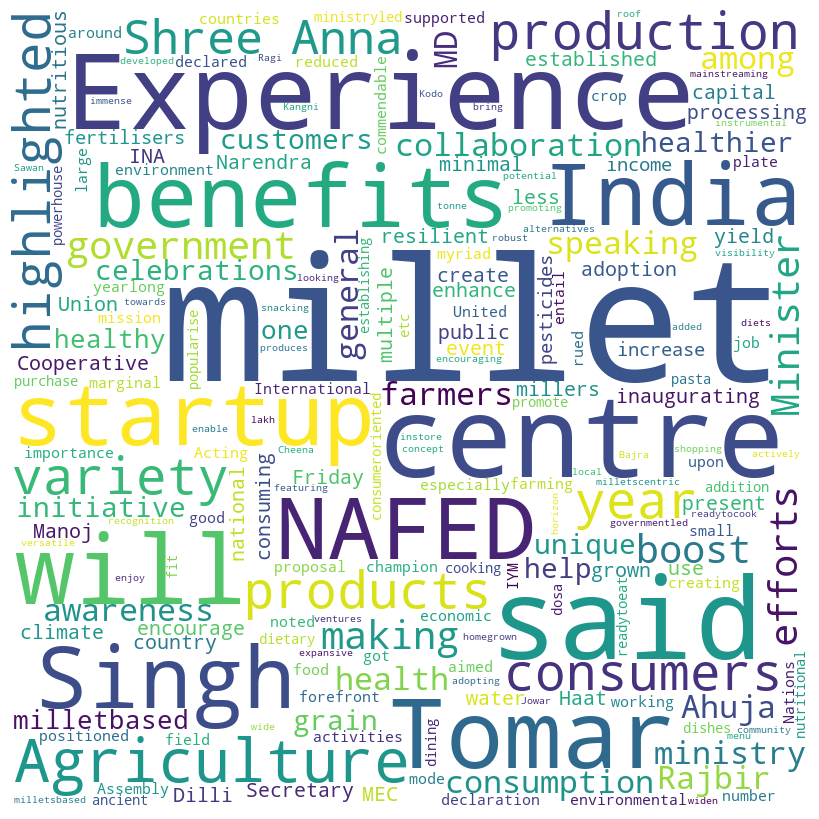

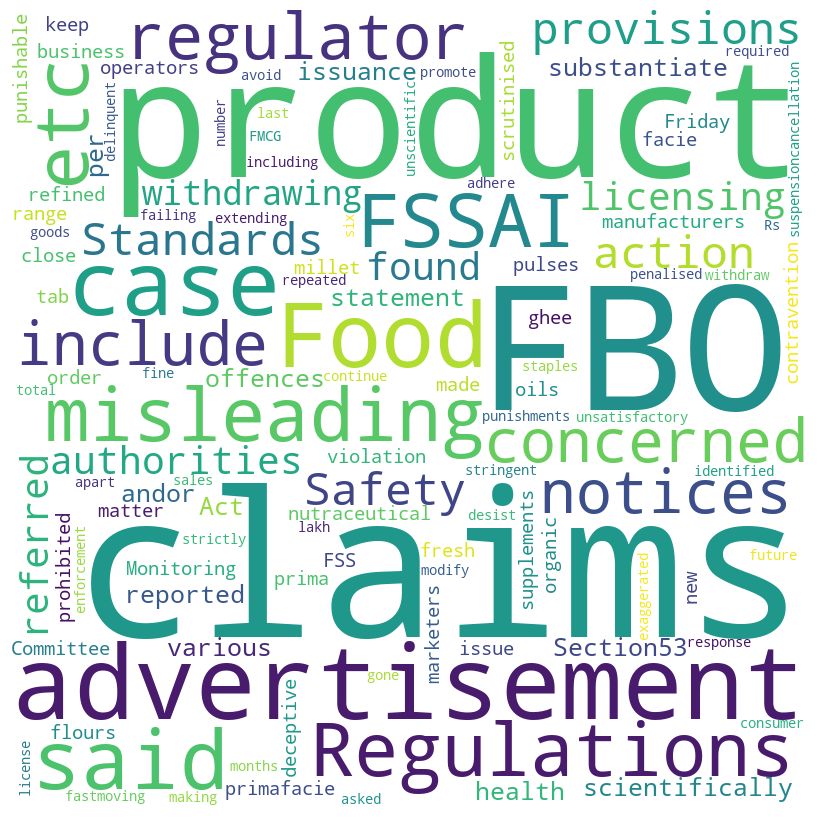

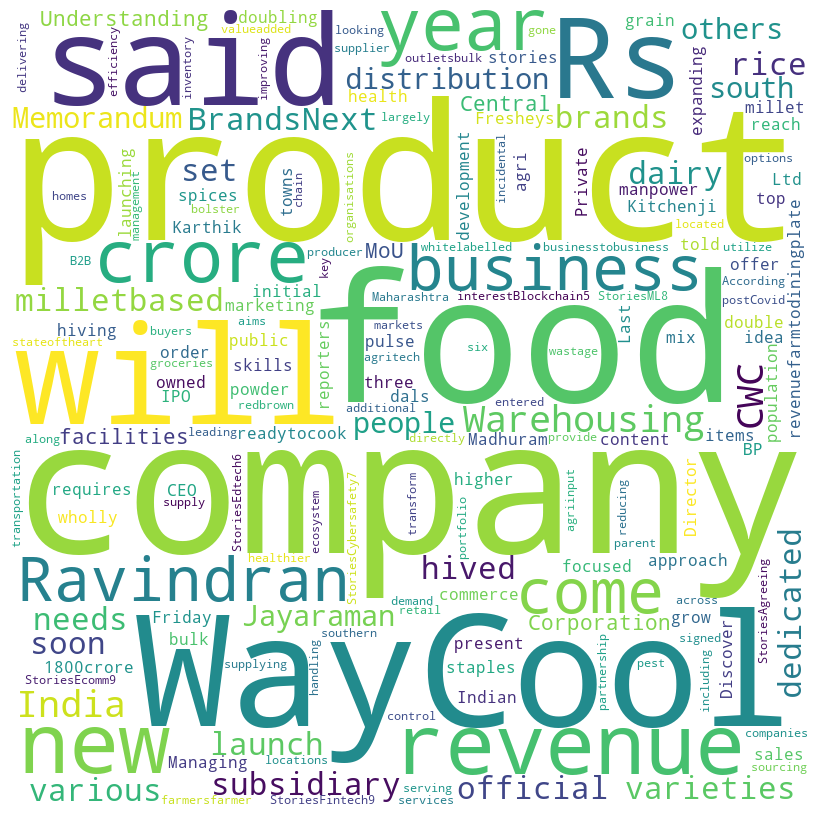

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object
for doc in doc_complete:
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(doc)

# Display the word cloud
    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


## Bigrams

In [29]:
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.corpus import stopwords

tokens = nltk.word_tokenize(doc_complete[0].lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words]

finder = BigramCollocationFinder.from_words(tokens)

finder.apply_freq_filter(2) 
bigrams = finder.nbest(BigramAssocMeasures().raw_freq, 20)

# Print the bigrams
for bigram in bigrams:
    print(bigram)


('shri', 'anna')
('millet', 'production')
('international', 'year')
('per', 'cent')
('year', 'millets')
('.', 'government')
('anna', 'millets')
('global', 'millet')
('government', 'india')
('largest', 'producer')
('millets', '.')
('number', 'people')
('nutritional', 'value')
('production', 'consumption')


## Word cloud

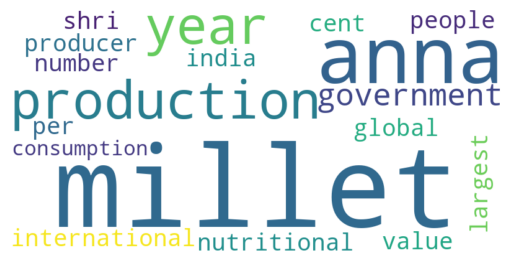

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert bigrams to a string
bigram_str = " ".join([f"{bigram[0]} {bigram[1]}" for bigram in bigrams])


#bigram_str 
# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(bigram_str)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<!-- neg: 0.01 (represents the negative sentiment score)
neu: 0.875 (represents the neutral sentiment score)
pos: 0.114 (represents the positive sentiment score)
compound: 0.997 (represents the overall sentiment score, where values closer to 1 indicate a highly positive sentiment, and values closer to -1 indicate a highly negative sentiment) -->